## Movie Review Classifier: Bernoulli Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Bernoulli Naive Bayes

In [7]:
import pandas as pd
train_data = pd.read_csv('movie_review_train.csv')
test_data = pd.read_csv('movie_review_train.csv')
train_data.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [8]:
#df.column_name.value_counts() - gives no. of unique inputs in that columns
train_data['class'].value_counts()
test_data['class'].value_counts()

Pos    800
Neg    800
Name: class, dtype: int64

In [9]:
# mapping labels to 1 and 0
train_data['label'] = train_data['class'].map({'Neg':0, 'Pos':1})
test_data['label'] = test_data['class'].map({'Neg':0, 'Pos':1})

In [10]:
train_data['label'].value_counts()
test_data['label'].value_counts()

1    800
0    800
Name: label, dtype: int64

In [11]:
train_data.drop(['class'],axis=1,inplace=True)
test_data.drop(['class'],axis=1,inplace=True)

In [12]:
train_data.head()
test_data.head()

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1


In [13]:
X_train = train_data.text
y_train = train_data.label
X_test = test_data.text
y_test = test_data.label
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600,)
(1600,)
(1600,)
(1600,)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [15]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [16]:
vect.vocabulary_

{'common': 6284,
 'complaint': 6360,
 'film': 11832,
 'critics': 7378,
 'aren': 1810,
 'literate': 18603,
 'scripts': 27918,
 'available': 2319,
 'quiz': 25250,
 'gives': 13262,
 'signs': 28809,
 'hope': 15074,
 'art': 1928,
 'writing': 35521,
 'isn': 16771,
 'dead': 7904,
 'hollywood': 14963,
 'need': 21281,
 'look': 18770,
 'independent': 15988,
 'films': 11851,
 'thoughtful': 32060,
 'content': 6771,
 'paul': 23045,
 'attanasio': 2173,
 'script': 27912,
 'takes': 31486,
 'tepid': 31839,
 'thriller': 32090,
 'scandals': 27629,
 'late': 18017,
 '50s': 313,
 'delivers': 8215,
 'telling': 31765,
 'parable': 22815,
 'emptiness': 10340,
 'post': 24178,
 'war': 34707,
 'american': 1334,
 'dream': 9554,
 'golden': 13449,
 'bubble': 4285,
 'surrounds': 31156,
 'protects': 24849,
 'tv': 33056,
 'networks': 21378,
 'sponsors': 29948,
 'riddled': 26743,
 'symbols': 31370,
 '58': 328,
 'chrysler': 5614,
 'radio': 25314,
 'announcement': 1534,
 'sputnik': 30053,
 'heavy': 14532,
 'handed': 14185,

In [17]:
len(vect.vocabulary_)

35858

In [26]:
vect.get_feature_names_out()

array(['00', '000', '007', ..., 'zus', 'zwick', 'zwigoff'], dtype=object)

In [19]:
vectnew = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)

In [20]:
vectnew.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [21]:
vectnew.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [22]:
len(vectnew.get_feature_names())

/Users/amritasingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1643

In [23]:
# transform
X_train_transformed = vectnew.transform(X_train)
X_test_tranformed =vectnew.transform(X_test)

In [30]:
import numpy as np
np.asarray(X_test_tranformed.count())

AttributeError: count not found

In [17]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.9770279971284996

In [18]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  31,  154]])

In [20]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1207    1]

 [  31  154]]


In [21]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8324324324324325


In [22]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9991721854304636


In [23]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9935483870967742

0.9935483870967742


In [24]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9935483870967742

PRECISION SCORE : 0.9935483870967742

RECALL SCORE : 0.8324324324324325

F1 SCORE : 0.9058823529411765


In [25]:
y_pred_proba

array([[1.00000000e+00, 1.54647985e-10],
       [1.00000000e+00, 1.69177313e-10],
       [9.99999997e-01, 2.52488636e-09],
       ...,
       [9.99994219e-01, 5.78141360e-06],
       [3.64570741e-06, 9.99996354e-01],
       [1.00000000e+00, 2.90374743e-12]])

In [26]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [27]:
print (roc_auc)

0.9967692858421334


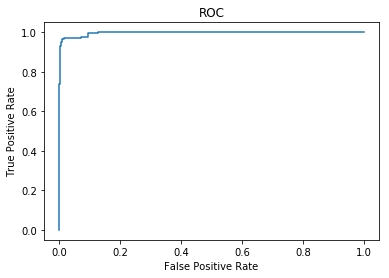

In [31]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)